# 03_EDA
Exploratory Data Analysis (EDA) for data scraped from subreddits involves gaining insights into the dataset's characteristics, identifying patterns, and understanding its underlying structure. 

---
## Import libraries

In [1]:
# standard imports
import pandas as pd
import numpy as np
import re
from collections import Counter

# modelling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# nltk library
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

In [2]:
# uncomment the following to install wordcloud, a library to perform spelling check and correction
# !pip install wordcloud

---
## EDA 

Analyse the comment text using techniques such as word frequency analysis, sentiment analysis, and topic modeling to uncover key themes and trends.
Compute word frequencies, identify common phrases or keywords, and visualise word clouds to understand the language used in the comments.

Specific techniques explored:

1. Text Analysis and $n$-gram Analysis
2. Word Cloud
3. Comment Length Distribution
4. Sentiment Analysis
5. Topic Modelling

---
### Overview of dataset
Understand the size of the dataset (number of comments), the structure of the data (columns), and the types of variables present (e.g., `body`, `score`, `created_utc`).

In [3]:
comments_df = pd.read_csv('../data/02_cleaned_data.csv')

In [4]:
comments_df

,comment_id,parent_id,post_id,body,score,post_title,subreddit,body_cleaned,body_cleaned_lemmatized
0,dpep775,t3_7b0y34,t3_7b0y34,I love how onion updates to The city,1349,"'No Way To Prevent This,’ Says Only Nation Whe...",TheOnion,love onion updates city,love onion update city
1,dpee371,t3_7b0y34,t3_7b0y34,...again.,4780,"'No Way To Prevent This,’ Says Only Nation Whe...",TheOnion,again,again
2,dpex3x5,t3_7b0y34,t3_7b0y34,"Just need to finish it off with ""Our thoughts ...",262,"'No Way To Prevent This,’ Says Only Nation Whe...",TheOnion,need finish Our thoughts prayers go victims fa...,need finish our thought prayer go victim famil...
3,dpejj86,t3_7b0y34,t3_7b0y34,thousands of people going to prison for weed E...,2265,"'No Way To Prevent This,’ Says Only Nation Whe...",TheOnion,thousands people going prison weed EVERY DAY ‘...,thousand people go prison weed every day ‘ no ...
4,dpeiwa9,t3_7b0y34,t3_7b0y34,Every law abiding citizen in Australia that wa...,1958,"'No Way To Prevent This,’ Says Only Nation Whe...",TheOnion,Every law abiding citizen Australia wants gun ...,every law abide citizen australia want gun sti...
...,...,...,...,...,...,...,...,...,...
37774,gfv68hn,t3_kd8bdc,t3_kd8bdc,I predict this confirmation thing is going to ...,3,President-elect Joe Biden clears 270-vote thre...,news,predict confirmation thing going thing Biden l...,predict confirmation thing go thing biden long...
37775,gfv78uj,t3_kd8bdc,t3_kd8bdc,I'm excited for the cheeto's rage tweeting later,3,President-elect Joe Biden clears 270-vote thre...,news,Im excited cheeto rage tweeting later,im excite cheeto rage tweet later
37776,gfv7xr7,t3_kd8bdc,t3_kd8bdc,I wonder if Republicans will purposely not ref...,3,President-elect Joe Biden clears 270-vote thre...,news,wonder Republicans purposely refer Biden Mr Pr...,wonder republican purposely refer biden mr pre...
37777,gfv8r3z,t3_kd8bdc,t3_kd8bdc,Looking forward to when the whitehouse finally...,3,President-elect Joe Biden clears 270-vote thre...,news,Looking forward whitehouse finally flushes flo...,look forward whitehouse finally flush floater ...


In [5]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37779 entries, 0 to 37778
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   comment_id               37779 non-null  object
 1   parent_id                37779 non-null  object
 2   post_id                  37779 non-null  object
 3   body                     37779 non-null  object
 4   score                    37779 non-null  int64 
 5   post_title               37779 non-null  object
 6   subreddit                37779 non-null  object
 7   body_cleaned             37779 non-null  object
 8   body_cleaned_lemmatized  37779 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.6+ MB


In [6]:
comments_df.groupby('subreddit')[['subreddit']].count()

,subreddit
subreddit,
TheOnion,17809
news,19970


In [7]:
# convert all comments to string
comments_df['body_cleaned_lemmatized'] = comments_df['body_cleaned_lemmatized'].astype(str)

#### Add `comment_length` column
- Comment length refers to the number of words in each original comment.

In [8]:
comments_df['comment_length'] = comments_df['body'].map(lambda x: len(x.split()))
comments_df

,comment_id,parent_id,post_id,body,score,post_title,subreddit,body_cleaned,body_cleaned_lemmatized,comment_length
0,dpep775,t3_7b0y34,t3_7b0y34,I love how onion updates to The city,1349,"'No Way To Prevent This,’ Says Only Nation Whe...",TheOnion,love onion updates city,love onion update city,8
1,dpee371,t3_7b0y34,t3_7b0y34,...again.,4780,"'No Way To Prevent This,’ Says Only Nation Whe...",TheOnion,again,again,1
2,dpex3x5,t3_7b0y34,t3_7b0y34,"Just need to finish it off with ""Our thoughts ...",262,"'No Way To Prevent This,’ Says Only Nation Whe...",TheOnion,need finish Our thoughts prayers go victims fa...,need finish our thought prayer go victim famil...,23
3,dpejj86,t3_7b0y34,t3_7b0y34,thousands of people going to prison for weed E...,2265,"'No Way To Prevent This,’ Says Only Nation Whe...",TheOnion,thousands people going prison weed EVERY DAY ‘...,thousand people go prison weed every day ‘ no ...,15
4,dpeiwa9,t3_7b0y34,t3_7b0y34,Every law abiding citizen in Australia that wa...,1958,"'No Way To Prevent This,’ Says Only Nation Whe...",TheOnion,Every law abiding citizen Australia wants gun ...,every law abide citizen australia want gun sti...,23
...,...,...,...,...,...,...,...,...,...,...
37774,gfv68hn,t3_kd8bdc,t3_kd8bdc,I predict this confirmation thing is going to ...,3,President-elect Joe Biden clears 270-vote thre...,news,predict confirmation thing going thing Biden l...,predict confirmation thing go thing biden long...,62
37775,gfv78uj,t3_kd8bdc,t3_kd8bdc,I'm excited for the cheeto's rage tweeting later,3,President-elect Joe Biden clears 270-vote thre...,news,Im excited cheeto rage tweeting later,im excite cheeto rage tweet later,8
37776,gfv7xr7,t3_kd8bdc,t3_kd8bdc,I wonder if Republicans will purposely not ref...,3,President-elect Joe Biden clears 270-vote thre...,news,wonder Republicans purposely refer Biden Mr Pr...,wonder republican purposely refer biden mr pre...,16
37777,gfv8r3z,t3_kd8bdc,t3_kd8bdc,Looking forward to when the whitehouse finally...,3,President-elect Joe Biden clears 270-vote thre...,news,Looking forward whitehouse finally flushes flo...,look forward whitehouse finally flush floater ...,24


#### Add `sentiment_score` column

To generate sentiment scores for each comment, we used the sentiment analysis library TextBlob which provides pre-trained models for analysing sentiment in text data. The function `calculate_sentiment` calculates sentiment scores for each comment in the 'body' column of the `comments_df` DataFrame. Each score is then added into a new `sentiment_score` column.

- The polarity score is a float within the range [-1.0, 1.0].
- -1.0 is very negative and 1.0 is very positive.

In [9]:
from textblob import TextBlob

In [10]:
# function to calculate sentiment score for each comment
def calculate_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# apply sentiment analysis to the 'comment_text' column
comments_df['sentiment_score'] = comments_df['body'].apply(calculate_sentiment)
comments_df.head(3)

,comment_id,parent_id,post_id,body,score,post_title,subreddit,body_cleaned,body_cleaned_lemmatized,comment_length,sentiment_score
0,dpep775,t3_7b0y34,t3_7b0y34,I love how onion updates to The city,1349,"'No Way To Prevent This,’ Says Only Nation Whe...",TheOnion,love onion updates city,love onion update city,8,0.5
1,dpee371,t3_7b0y34,t3_7b0y34,...again.,4780,"'No Way To Prevent This,’ Says Only Nation Whe...",TheOnion,again,again,1,0.0
2,dpex3x5,t3_7b0y34,t3_7b0y34,"Just need to finish it off with ""Our thoughts ...",262,"'No Way To Prevent This,’ Says Only Nation Whe...",TheOnion,need finish Our thoughts prayers go victims fa...,need finish our thought prayer go victim famil...,23,0.2


#### Create a separate data frame for each subreddit
- `news_comments_df` for r/news
- `onion_comments_df` for r/TheOnion

In [11]:
news_comments_df = comments_df.loc[comments_df['subreddit'] == 'news'] 
news_comments_df.head(5)

,comment_id,parent_id,post_id,body,score,post_title,subreddit,body_cleaned,body_cleaned_lemmatized,comment_length,sentiment_score
17809,gbgsbi4,t3_jptqj9,t3_jptqj9,"As you all celebrate or commiserate, please he...",1,Joe Biden elected president of the United States,news,celebrate commiserate please help us reporting...,celebrate commiserate please help u reporting ...,138,0.15
17810,gbhfdv2,t3_jptqj9,t3_jptqj9,"Congratulations USA! From Brazil, I hope Bolso...",172,Joe Biden elected president of the United States,news,Congratulations USA Brazil hope Bolsonaro next...,congratulation usa brazil hope bolsonaro next ...,12,0.00
17811,gbgt3me,t3_jptqj9,t3_jptqj9,"Fox News just called it a couple minutes ago, ...",8749,Joe Biden elected president of the United States,news,Fox News called couple minutes ago know real,fox news call couple minute ago know real,14,0.20
17812,gbgvvs7,t3_jptqj9,t3_jptqj9,"""You were expecting Nevada to decide the elect...",16552,Joe Biden elected president of the United States,news,You expecting Nevada decide election ME PENNSY...,you expect nevada decide election me pennsylvania,13,0.00
17813,gbgr8hw,t3_jptqj9,t3_jptqj9,"Is it 100% confirmed, as in nothing can take t...",3176,Joe Biden elected president of the United States,news,100 confirmed nothing take away,100 confirm nothing take away,11,0.40


In [12]:
onion_comments_df = comments_df.loc[comments_df['subreddit'] == 'TheOnion'] 
onion_comments_df.head(5)

,comment_id,parent_id,post_id,body,score,post_title,subreddit,body_cleaned,body_cleaned_lemmatized,comment_length,sentiment_score
0,dpep775,t3_7b0y34,t3_7b0y34,I love how onion updates to The city,1349,"'No Way To Prevent This,’ Says Only Nation Whe...",TheOnion,love onion updates city,love onion update city,8,0.500000
1,dpee371,t3_7b0y34,t3_7b0y34,...again.,4780,"'No Way To Prevent This,’ Says Only Nation Whe...",TheOnion,again,again,1,0.000000
2,dpex3x5,t3_7b0y34,t3_7b0y34,"Just need to finish it off with ""Our thoughts ...",262,"'No Way To Prevent This,’ Says Only Nation Whe...",TheOnion,need finish Our thoughts prayers go victims fa...,need finish our thought prayer go victim famil...,23,0.200000
3,dpejj86,t3_7b0y34,t3_7b0y34,thousands of people going to prison for weed E...,2265,"'No Way To Prevent This,’ Says Only Nation Whe...",TheOnion,thousands people going prison weed EVERY DAY ‘...,thousand people go prison weed every day ‘ no ...,15,0.000000
4,dpeiwa9,t3_7b0y34,t3_7b0y34,Every law abiding citizen in Australia that wa...,1958,"'No Way To Prevent This,’ Says Only Nation Whe...",TheOnion,Every law abiding citizen Australia wants gun ...,every law abide citizen australia want gun sti...,23,0.011111


---
### EDA, Part 1: Text Analysis and $n$-gram Analysis

Specific outliers including special characters and non-meaningful words (aka 'non-identifiers') are compiled into lists to be excluded from the comments.
This is done to obtain a more meaningful comparison of the top 20 words in each subreddit.

In [13]:
outliers = ["“", "”", "u"]
non_identifiers = ["like", "it", "would", "im"]
removed = outliers + non_identifiers

In [14]:
# remove outliers and non-identifiers
news_comments_df['body_cleaned_lemmatized'] = news_comments_df['body_cleaned_lemmatized'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in removed]))

# generate top n most frequent words
news_word_freq = news_comments_df['body_cleaned_lemmatized'].str.split(expand=True).stack().value_counts()

print("Top 20 most frequent words from r/news:")
print(news_word_freq.head(20))

/var/folders/vz/145gpzx54wn19kkmfg10cxyr0000gn/T/ipykernel_66777/919036267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_comments_df['body_cleaned_lemmatized'] = news_comments_df['body_cleaned_lemmatized'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in removed]))


Top 20 most frequent words from r/news:
get       3244
people    2787
fuck      2741
go        2575
one       1907
make      1850
say       1805
time      1574
trump     1538
year      1488
see       1415
good      1316
know      1314
take      1307
even      1219
need      1146
well      1115
right     1112
think     1106
want      1043
Name: count, dtype: int64


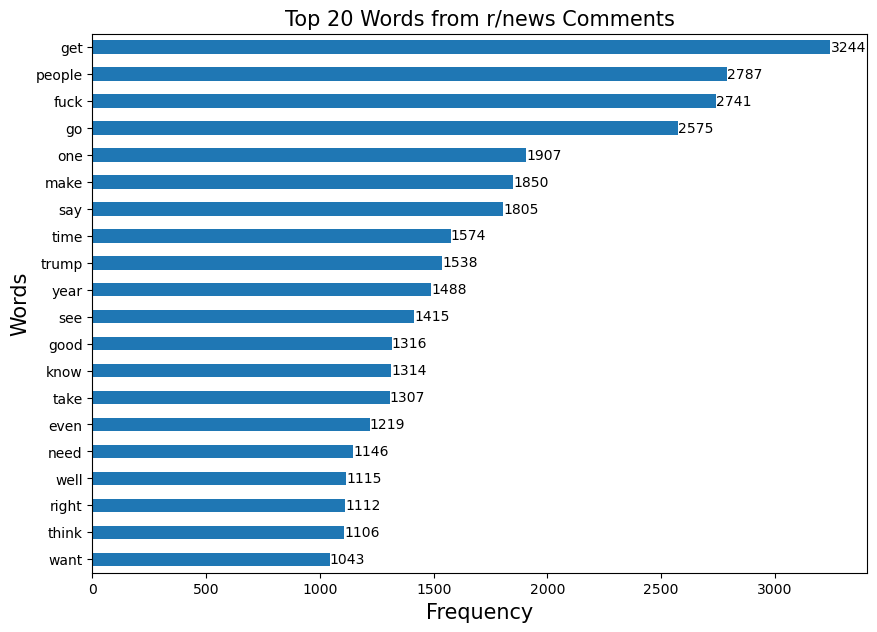

In [15]:
# bar plot of top 20 words for r/news comments
ax1 = news_word_freq.head(20).sort_values(ascending=True).plot(kind='barh',figsize=(10, 7))
plt.title('Top 20 Words from r/news Comments').set_size(15)
ax1.set_xlabel("Frequency").set_size(15)
ax1.set_ylabel("Words").set_size(15)
ax1.bar_label(ax1.containers[0])
plt.show();

In [16]:
# remove outliers and non-indentifiers
onion_comments_df['body_cleaned_lemmatized'] = onion_comments_df['body_cleaned_lemmatized'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in removed]))

# generate top n most frequent words
onion_word_freq = onion_comments_df['body_cleaned_lemmatized'].str.split(expand=True).stack().value_counts()
print("Top 20 most frequent words from r/TheOnion:")
print(onion_word_freq.head(20))

/var/folders/vz/145gpzx54wn19kkmfg10cxyr0000gn/T/ipykernel_66777/1758899025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onion_comments_df['body_cleaned_lemmatized'] = onion_comments_df['body_cleaned_lemmatized'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in removed]))


Top 20 most frequent words from r/TheOnion:
gun        4449
people     4297
say        2410
get        2357
one        2135
make       1933
go         1863
think      1684
right      1492
know       1374
thing      1371
israel     1364
kill       1301
even       1299
country    1279
well       1239
want       1232
time       1182
take       1142
fuck       1094
Name: count, dtype: int64


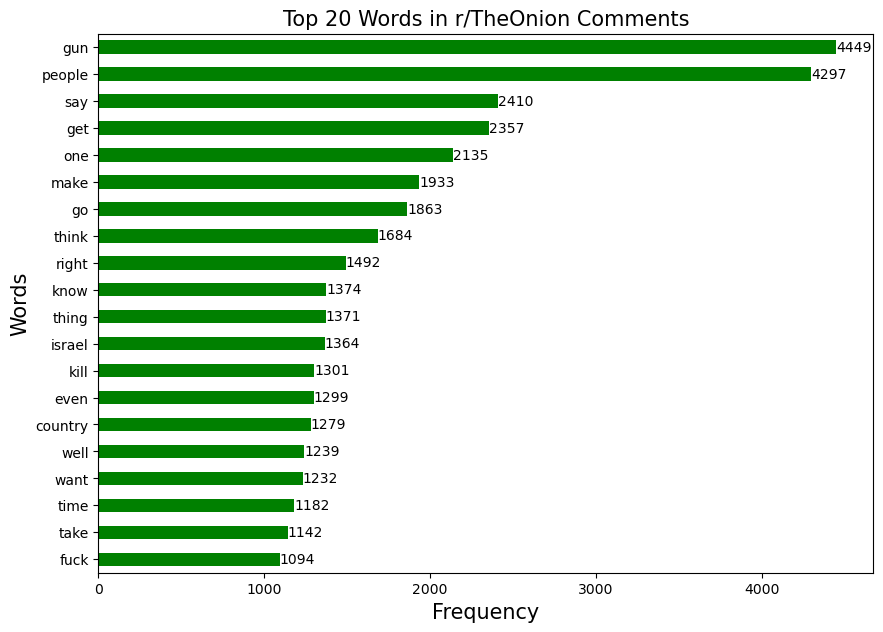

In [17]:
# bar plot of top 20 words for r/TheOnion comments
ax2 = onion_word_freq.head(20).sort_values(ascending=True).plot(kind='barh',figsize=(10, 7),color='green')
plt.title('Top 20 Words in r/TheOnion Comments').set_size(15)
ax2.set_xlabel("Frequency").set_size(15)
ax2.set_ylabel("Words").set_size(15)
ax2.bar_label(ax2.containers[0])
plt.show();

Bar plots for top 20 words in both r/news and r/TheOnion were not included in the presentation.

Instead, we opted for word cloud comparison and a Venn diagram to show the common top 20 words in both subreddits.

In [18]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

##### Create `get_top_ngrams` function

To generate the top n-gram words from a given subreddit's data.
    
Args:
- `subreddit_comments` (list): The text data from the subreddit.
- `n` (int): The value of n for n-grams.
- `num_ngrams` (int): The number of top n-grams to return.
        
Returns:
- A list containing top n-grams and their respective counts.

In [19]:
def get_top_ngrams(subreddit_comments, n, num_ngrams):

    # Convert input data to a list of strings
    if isinstance(subreddit_comments, str):
        subreddit_comments = [subreddit_comments]
    
    # Preprocess the data
    processed_data = [' '.join(re.findall(r'\w+', text.lower())) for text in subreddit_comments]
    
    # Generate n-grams
    all_ngrams = []
    for text in processed_data:
        tokens = text.split()
        ngrams_list = list(ngrams(tokens, n))
        all_ngrams.extend(ngrams_list)
    
    # Count the occurrences of n-grams
    ngram_counts = Counter(all_ngrams)
    
    # Get the top n-grams
    top_ngrams = ngram_counts.most_common(num_ngrams)

    # Format the output strings
    output_strings = [f"{' '.join(ngram)}: {count}" for ngram, count in top_ngrams]
    
    return output_strings

In [20]:
# function to convert ngram result into data frame
# for easier conversion into data visualisation
def ngram_to_df(input_list):
    # Split each string in the input list by colon
    lines = [line.split(": ") for line in input_list]

    # Extract text and count from each line
    texts, counts = zip(*lines)

    # Create DataFrame
    df = pd.DataFrame({"text": texts, "count": counts})

    # Convert count column to integer type
    df["count"] = df["count"].astype(int)
    
    return df

##### Compare top unigrams from each subreddit

In [21]:
# Get top 10 unigrams from r/news (n=1)
top_unigrams_news = get_top_ngrams(news_comments_df['body_cleaned_lemmatized'], n=1, num_ngrams=10)
print("Top unigrams from r/news comments:")
for unigram in top_unigrams_news:
    print(unigram)

# Get top 10 unigrams r/TheOnion (n=1)
top_unigrams_onion = get_top_ngrams(onion_comments_df['body_cleaned_lemmatized'], n=1, num_ngrams=10)
print("\nTop unigrams from r/TheOnion comments:")
for unigram in top_unigrams_onion:
    print(unigram)

Top unigrams from r/news comments:
get: 3244
people: 2787
fuck: 2745
go: 2575
one: 1908
make: 1850
say: 1807
time: 1575
trump: 1540
year: 1489

Top unigrams from r/TheOnion comments:
gun: 4449
people: 4298
say: 2410
get: 2358
one: 2136
make: 1933
go: 1863
think: 1684
right: 1492
know: 1375


##### Compare top bigrams from each subreddit

In [22]:
# Get top 10 bigrams from r/news (n=2)
top_bigrams_news = get_top_ngrams(news_comments_df['body_cleaned_lemmatized'], n=2, num_ngrams=10)
print("Top bigrams from r/news comments:")
for bigram in top_bigrams_news:
    print(bigram)

# Get top 10 bigrams r/TheOnion (n=2)
top_bigrams_onion = get_top_ngrams(onion_comments_df['body_cleaned_lemmatized'], n=2, num_ngrams=10)
print("\nTop bigrams from r/TheOnion comments:")
for bigram in top_bigrams_onion:
    print(bigram)

Top bigrams from r/news comments:
fuck fuck: 376
gon na: 288
rest peace: 183
supreme court: 163
piece shit: 147
fox news: 145
year old: 142
united state: 139
year ago: 138
net neutrality: 138

Top bigrams from r/TheOnion comments:
mass shooting: 444
gun control: 378
mental health: 248
mass shoot: 210
gun law: 201
gon na: 154
gun violence: 150
background check: 144
kill people: 141
united state: 141


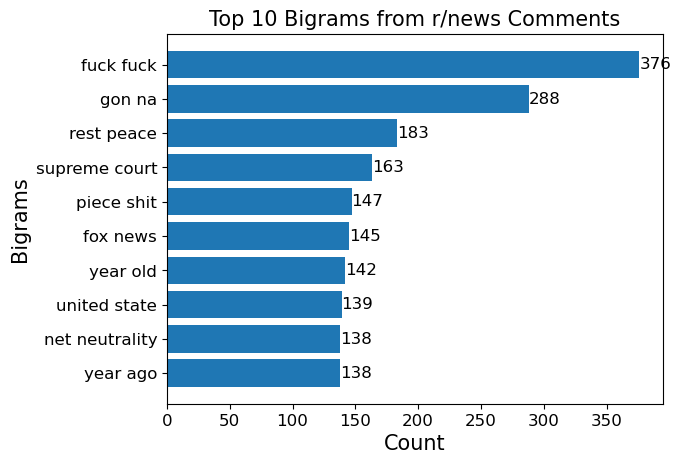

In [23]:
# Create a data frame of the top 10 bigrams from r/news
top_bigrams_news_df = ngram_to_df(top_bigrams_news).head(10).sort_values(by='count',ascending=True)

# Select two columns from the DataFrame
x_values = top_bigrams_news_df['text']
y_values = top_bigrams_news_df['count']

# Annotate each bar with its count value
for i, v in enumerate(y_values):
    plt.text(v, i, str(v), ha='left', va='center').set_size(12)

# Change the text size of the tick labels (intervals) on the axes
plt.tick_params(axis='both', which='major', labelsize=12)

# Plot the data
plt.barh(x_values, y_values)
plt.xlabel('Count').set_size(15)
plt.ylabel('Bigrams').set_size(15)
plt.title('Top 10 Bigrams from r/news Comments').set_size(15)
plt.show()

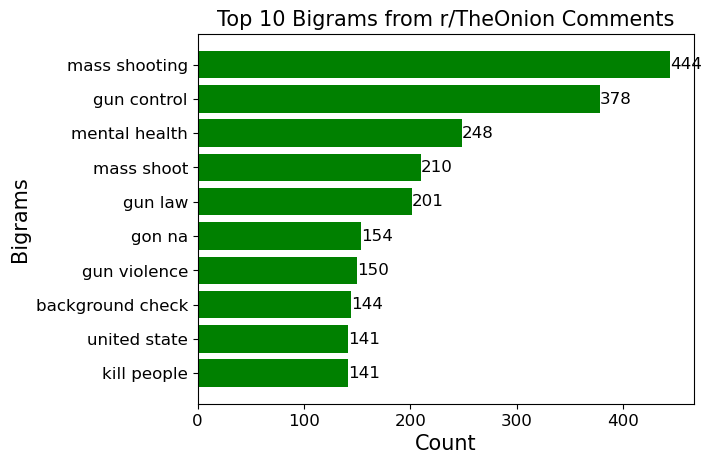

In [24]:
# Create a data frame of the top 10 bigrams from r/TheOnion
top_bigrams_onion_df = ngram_to_df(top_bigrams_onion).head(10).sort_values(by='count',ascending=True)

# Select two columns from the DataFrame
x_values = top_bigrams_onion_df['text']
y_values = top_bigrams_onion_df['count']

# Annotate each bar with its count value
for i, v in enumerate(y_values):
    plt.text(v, i, str(v), ha='left', va='center').set_size(12)

# Change the text size of the tick labels (intervals) on the axes
plt.tick_params(axis='both', which='major', labelsize=12)

# Plot the data
plt.barh(x_values, y_values, color='green')
plt.xlabel('Count').set_size(15)
plt.ylabel('Bigrams').set_size(15)
plt.title('Top 10 Bigrams from r/TheOnion Comments').set_size(15)
plt.show()

Bar plots for top 10 bigrams in each subreddit are included in the presentation as they indicate an observable difference in theme.

For example, r/news bigrams tend to be more neutral whereas r/TheOnion bigrams tend to be more violent.

##### Compare top 3-grams from each subreddit
Comparison becomes less meaningful once n >= 3.
Further data cleaning is required.

In [25]:
# Get top 10 3-grams from r/news (n=3)
top_three_grams_news = get_top_ngrams(news_comments_df['body_cleaned_lemmatized'], n=3, num_ngrams=10)
print("Top 3-grams from r/news comments:")
for n_gram in top_three_grams_news:
    print(n_gram)

# Get top 10 3-grams from r/TheOnion (n=3)
top_three_grams_onion = get_top_ngrams(onion_comments_df['body_cleaned_lemmatized'], n=3, num_ngrams=10)
print("\nTop 3-grams from r/TheOnion comments:")
for n_gram in top_three_grams_onion:
    print(n_gram)

Top 3-grams from r/news comments:
fuck fuck fuck: 355
president united state: 37
13 year old: 34
na na na: 29
cant wait see: 25
step right direction: 22
may rest peace: 22
supreme court justice: 22
gon na get: 20
make america great: 20

Top 3-grams from r/TheOnion comments:
downvote to remove: 48
pm exclude me: 47
exclude me exclude: 47
me exclude from: 47
exclude from subreddit: 47
from subreddit faq: 47
subreddit faq information: 47
faq information source: 47
to remove v028: 39
good guy gun: 34


##### Compare top 4-grams from each subreddit
Comparison becomes less meaningful once n >= 3.
Further data cleaning is required.

In [26]:
# Get top 10 4-grams from r/news (n=4)
top_four_grams_news = get_top_ngrams(news_comments_df['body_cleaned_lemmatized'], n=4, num_ngrams=10)
print("Top 4-grams for r/news comments:")
for n_gram in top_four_grams_news:
    print(n_gram)

# Get top 10 4-grams from r/TheOnion (n=4)
top_four_grams_onion = get_top_ngrams(onion_comments_df['body_cleaned_lemmatized'], n=4, num_ngrams=10)
print("\nTop 4-grams for r/TheOnion comments:")
for n_gram in top_four_grams_onion:
    print(n_gram)

Top 4-grams for r/news comments:
fuck fuck fuck fuck: 350
na na na na: 24
vote absentee check status: 20
absentee check status ballot: 20
check status ballot now: 20
status ballot now rejectedyou: 20
voter vote absentee check: 19
friend i wan na: 16
jail jail jail jail: 16
i wan na thank: 15

Top 4-grams for r/TheOnion comments:
pm exclude me exclude: 47
exclude me exclude from: 47
me exclude from subreddit: 47
exclude from subreddit faq: 47
from subreddit faq information: 47
subreddit faq information source: 47
downvote to remove v028: 39
culturethe culturethe culturethe culturethe: 32
faq information source donate: 30
information source donate downvote: 30


##### Compare top 5-grams from each subreddit
Comparison becomes less meaningful once n >= 3.
Further data cleaning is required.

In [27]:
# Get top 10 5-grams from r/news (n=3)
top_five_grams_news = get_top_ngrams(news_comments_df['body_cleaned_lemmatized'], n=5, num_ngrams=10)
print("Top 5-grams for r/news comments:")
for n_gram in top_five_grams_news:
    print(n_gram)

# Get top 10 5-grams from r/TheOnion (n=3)
top_five_grams_onion = get_top_ngrams(onion_comments_df['body_cleaned_lemmatized'], n=5, num_ngrams=10)
print("\nTop 5-grams for r/TheOnion comments:")
for n_gram in top_five_grams_onion:
    print(n_gram)

Top 5-grams for r/news comments:
fuck fuck fuck fuck fuck: 348
vote absentee check status ballot: 20
absentee check status ballot now: 20
check status ballot now rejectedyou: 20
na na na na na: 19
voter vote absentee check status: 19
friend i wan na thank: 15
i wan na thank you: 15
jail jail jail jail jail: 15
thank friend i wan na: 14

Top 5-grams for r/TheOnion comments:
pm exclude me exclude from: 47
exclude me exclude from subreddit: 47
me exclude from subreddit faq: 47
exclude from subreddit faq information: 47
from subreddit faq information source: 47
culturethe culturethe culturethe culturethe culturethe: 31
subreddit faq information source donate: 30
faq information source donate downvote: 30
information source donate downvote to: 30
source donate downvote to remove: 30


---
### Post-EDA Data Cleaning 

##### Compare top 4-grams from each subreddit

**The following texts occur frequently but are not so meaningful, adding "noise" to our data. These texts are either repetitive thought expressions by commenters, or standard footers from a submission template that was not properly cleaned during data cleaning stage.**

1. consecutive use of words "jail" in a single comment
2. consecutive use of words "f\*ck" in a single comment with the word "f\*ck" repeated 320 times, without any other words in the same comment
3. consecutive use of words "cultureThe" in a single comment
4. the word "gonna" was lemmatized into "gon na"
5. standard footer from a submission template that, after lemmatization, becomes "pm exclude me exclude from subreddit faq information source downvote to remove v028"
6. standard footer from a submission template that, after lemmatization, becomes "nonmobile link helperbot v11 rhelperbot i be a bot please message uswim1929 with any feedback andor hate counter <6-digit number>"

> Post-EDA data cleaning will be carried out to remove these high frequency words/patterns. 

##### Function to clean away (1), (2), (3) and (4) in the observation

In [28]:
def remove_consecutive_repeated_words(text):

    # pattern to find any words that are repeating more than 2 times 
    pattern1 = r'\b(\w+)(?: \1\b)+'

    # replace with only 1 occurence of the word
    cleaned_text = re.sub(pattern1, r'\1', text.lower())

    # pattern to find "gon na" 
    pattern2 = r'gon\sna'

    # replace with the original word "gonna"
    cleaned_text = re.sub(pattern2, "gonna", cleaned_text.lower())

    return cleaned_text

#unit test
print(remove_consecutive_repeated_words("jail jail jail jail"))
print(remove_consecutive_repeated_words("jail jail jail gon na jail"))
print(remove_consecutive_repeated_words("[Na na na na, na na na na, hey hey hey, goodbye!](https://youtu.be/IoyvvEWHodk)"))
print(remove_consecutive_repeated_words(">The cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe cultureThe culture"))

jail
jail gonna jail
[na, na, hey, goodbye!](https://youtu.be/ioyvvewhodk)
>the culturethe culture


##### Function to detect and remove standard footer from a submission template, (5) in the observation

In [29]:
def remove_http_footer(text):
    # Define the regular expression pattern
    
    # Pattern if clean this in data cleaning on "body"
    #pattern = r'\^\[\s\[\^PM\].+\^remove\s\^\|\s\^v0.28'
    
    # Pattern if clean this in post-EDA, on the lemmatized text
    pattern = r'pm\sexclude\sme\sexclude\sfrom\ssubreddit\sfaq\sinformation\ssource\s.*downvote\sto\sremove\sv028'

    # Find matches
    matches = re.findall(pattern, text)

    # Remove matching patterns from the text
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

# Unit Test
print(remove_http_footer("^[ [^PM](https://www.reddit.com/message/compose?to=kittens_from_space) ^| [^Exclude ^me](https://reddit.com/message/compose?to=WikiTextBot&message=Excludeme&subject=Excludeme) ^| [^Exclude ^from ^subreddit](https://np.reddit.com/r/TheOnion/about/banned) ^| [^FAQ ^/ ^Information](https://np.reddit.com/r/WikiTextBot/wiki/index) ^| [^Source](https://github.com/kittenswolf/WikiTextBot) ^| [^Donate](https://www.reddit.com/r/WikiTextBot/wiki/donate)   ^]^Downvote ^to ^remove ^| ^v0.28"))
print(remove_http_footer("But there are other text in front ... before this fotter appear \n ^[ [^PM](https://www.reddit.com/message/compose?to=kittens_from_space) ^| [^Exclude ^me](https://reddit.com/message/compose?to=WikiTextBot&message=Excludeme&subject=Excludeme) ^| [^Exclude ^from ^subreddit](https://np.reddit.com/r/TheOnion/about/banned) ^| [^FAQ ^/ ^Information](https://np.reddit.com/r/WikiTextBot/wiki/index) ^| [^Source](https://github.com/kittenswolf/WikiTextBot) ^| [^Donate](https://www.reddit.com/r/WikiTextBot/wiki/donate)   ^]^Downvote ^to ^remove ^| ^v0.28"))

print(remove_http_footer("wound knee massacre wound knee massacre also call battle wound knee occur december 29 1890 near wound knee creek lakota ÄhaÅ‹kpÃ© Ã³pi wakpÃ¡la lakota pine ridge indian reservation u state south dakota previous day detachment u 7th cavalry regiment command major samuel m whitside intercept spot elk band miniconjou lakota 38 hunkpapa lakota near porcupine butte escort 5 mile 80 km westward wound knee creek make camp remainder 7th cavalry regiment lead colonel james w forsyth arrive surround encampment regiment support battery four hotchkiss mountain gun pm exclude me exclude from subreddit faq information source donate downvote to remove v028"))
print(remove_http_footer("wound knee massacre wound knee massacre also call battle wound knee occur december 29 1890 near wound knee creek lakota ÄhaÅ‹kpÃ© Ã³pi wakpÃ¡la lakota pine ridge indian reservation u state south dakota previous day detachment u 7th cavalry regiment command major samuel m whitside intercept spot elk band miniconjou lakota 38 hunkpapa lakota near porcupine butte escort 5 mile 80 km westward wound knee creek make camp remainder 7th cavalry regiment lead colonel james w forsyth arrive surround encampment regiment support battery four hotchkiss mountain gun pm exclude me exclude from subreddit faq information source downvote to remove v028"))

^[ [^PM](https://www.reddit.com/message/compose?to=kittens_from_space) ^| [^Exclude ^me](https://reddit.com/message/compose?to=WikiTextBot&message=Excludeme&subject=Excludeme) ^| [^Exclude ^from ^subreddit](https://np.reddit.com/r/TheOnion/about/banned) ^| [^FAQ ^/ ^Information](https://np.reddit.com/r/WikiTextBot/wiki/index) ^| [^Source](https://github.com/kittenswolf/WikiTextBot) ^| [^Donate](https://www.reddit.com/r/WikiTextBot/wiki/donate)   ^]^Downvote ^to ^remove ^| ^v0.28
But there are other text in front ... before this fotter appear 
 ^[ [^PM](https://www.reddit.com/message/compose?to=kittens_from_space) ^| [^Exclude ^me](https://reddit.com/message/compose?to=WikiTextBot&message=Excludeme&subject=Excludeme) ^| [^Exclude ^from ^subreddit](https://np.reddit.com/r/TheOnion/about/banned) ^| [^FAQ ^/ ^Information](https://np.reddit.com/r/WikiTextBot/wiki/index) ^| [^Source](https://github.com/kittenswolf/WikiTextBot) ^| [^Donate](https://www.reddit.com/r/WikiTextBot/wiki/donate)   

##### Function to detect and remove standard footer from a submission template, (6) in the observation

In [30]:
def remove_helperbot_footer(text):
    # Define the regular expression pattern
    pattern = r'nonmobile\slink\shelperbot\sv11\srhelperbot\si\sbe\sa\sbot\splease\smessage\suswim1929\swith\sany\sfeedback\sandor\shate\scounter\s\d{6}'

    # Find matches
    matches = re.findall(pattern, text)

    # Remove matching patterns from the text
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

print(remove_helperbot_footer("nonmobile link helperbot v11 rhelperbot i be a bot please message uswim1929 with any feedback andor hate counter 148969"))


##### Perform post-EDA data cleaning by addressing the 6 observations listed above

In [31]:
news_comments_df['body_cleaned_lemmatized'] = news_comments_df['body_cleaned_lemmatized'].map(remove_http_footer)
onion_comments_df['body_cleaned_lemmatized'] = onion_comments_df['body_cleaned_lemmatized'].map(remove_http_footer)
news_comments_df['body_cleaned_lemmatized'] = news_comments_df['body_cleaned_lemmatized'].map(remove_consecutive_repeated_words)
onion_comments_df['body_cleaned_lemmatized'] = onion_comments_df['body_cleaned_lemmatized'].map(remove_consecutive_repeated_words)
news_comments_df['body_cleaned_lemmatized'] = news_comments_df['body_cleaned_lemmatized'].map(remove_helperbot_footer)
onion_comments_df['body_cleaned_lemmatized'] = onion_comments_df['body_cleaned_lemmatized'].map(remove_helperbot_footer)

/var/folders/vz/145gpzx54wn19kkmfg10cxyr0000gn/T/ipykernel_66777/4137983497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_comments_df['body_cleaned_lemmatized'] = news_comments_df['body_cleaned_lemmatized'].map(remove_http_footer)
/var/folders/vz/145gpzx54wn19kkmfg10cxyr0000gn/T/ipykernel_66777/4137983497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onion_comments_df['body_cleaned_lemmatized'] = onion_comments_df['body_cleaned_lemmatized'].map(remove_http_footer)
/var/folders/vz/145gpzx54w

In [32]:
# if any "body_cleaned_lemmatized" become blank as a result of the cleaning, need to be cleaned away with dropna
news_comments_df = news_comments_df.dropna(subset=['body_cleaned_lemmatized'])
news_comments_df['body_cleaned_lemmatized'].isnull().sum()

onion_comments_df = onion_comments_df.dropna(subset=['body_cleaned_lemmatized'])
onion_comments_df['body_cleaned_lemmatized'].isnull().sum()

0

---
### Resume Text Analysis
##### Re-generate 3,4,5-grams for comparison

In [33]:
# Get top 10 3-grams from r/news (n=3)
top_three_grams_news = get_top_ngrams(news_comments_df['body_cleaned_lemmatized'], n=3, num_ngrams=10)
print("Top 3-grams from r/news comments:")
for n_gram in top_three_grams_news:
    print(n_gram)

# Get top 10 3-grams from r/TheOnion (n=3)
top_three_grams_onion = get_top_ngrams(onion_comments_df['body_cleaned_lemmatized'], n=3, num_ngrams=10)
print("\nTop 3-grams from r/TheOnion comments:")
for n_gram in top_three_grams_onion:
    print(n_gram)

Top 3-grams from r/news comments:
president united state: 37
13 year old: 34
cant wait see: 25
step right direction: 22
may rest peace: 22
supreme court justice: 22
make america great: 20
vote absentee check: 20
absentee check status: 20
check status ballot: 20

Top 3-grams from r/TheOnion comments:
good guy gun: 34
right bear arm: 34
law abide citizen: 33
mental health care: 33
gun control law: 32
mental health issue: 31
take away gun: 29
gun free zone: 28
no way prevent: 26
get rid gun: 26


In [34]:
# Get top 10 4-grams from r/news (n=4)
top_four_grams_news = get_top_ngrams(news_comments_df['body_cleaned_lemmatized'], n=4, num_ngrams=10)
print("Top 4-grams for r/news comments:")
for n_gram in top_four_grams_news:
    print(n_gram)

# Get top 10 4-grams from r/TheOnion (n=4)
top_four_grams_onion = get_top_ngrams(onion_comments_df['body_cleaned_lemmatized'], n=4, num_ngrams=10)
print("\nTop 4-grams for r/TheOnion comments:")
for n_gram in top_four_grams_onion:
    print(n_gram)

Top 4-grams for r/news comments:
vote absentee check status: 20
absentee check status ballot: 20
check status ballot now: 20
status ballot now rejectedyou: 20
voter vote absentee check: 19
friend i wan na: 16
i wan na thank: 15
wan na thank you: 15
thank friend i wan: 14
na thank you thank: 13

Top 4-grams for r/TheOnion comments:
no way prevent this: 18
right people keep bear: 15
people keep bear arm: 15
bear arm shall infringe: 15
keep bear arm shall: 14
necessary security free state: 13
well regulate militia necessary: 10
regulate militia necessary security: 10
militia necessary security free: 10
kelley purchase ruger ar556: 10


In [35]:
# Get top 10 5-grams from r/news (n=3)
top_five_grams_news = get_top_ngrams(news_comments_df['body_cleaned_lemmatized'], n=5, num_ngrams=10)
print("Top 5-grams for r/news comments:")
for n_gram in top_five_grams_news:
    print(n_gram)

# Get top 10 5-grams from r/TheOnion (n=3)
top_five_grams_onion = get_top_ngrams(onion_comments_df['body_cleaned_lemmatized'], n=5, num_ngrams=10)
print("\nTop 5-grams for r/TheOnion comments:")
for n_gram in top_five_grams_onion:
    print(n_gram)

Top 5-grams for r/news comments:
vote absentee check status ballot: 20
absentee check status ballot now: 20
check status ballot now rejectedyou: 20
voter vote absentee check status: 19
friend i wan na thank: 15
i wan na thank you: 15
thank friend i wan na: 14
wan na thank you thank: 13
na thank you thank friend: 12
thank you thank friend i: 10

Top 5-grams for r/TheOnion comments:
right people keep bear arm: 15
people keep bear arm shall: 14
keep bear arm shall infringe: 14
well regulate militia necessary security: 10
regulate militia necessary security free: 10
militia necessary security free state: 10
kelley purchase ruger ar556 rifle: 10
academy sport outdoors store san: 10
sport outdoors store san antonio: 10
necessary security free state right: 9


Once the identified categories of text have been removed, the n-grams for r/news tend to have a political theme whereas the n-grams for r/TheOnion tend to be related to guns and war.

For modelling, in the next stage, hyperparameter tuning will focus on the analysis of 1-gram and 2-grams only.

#### EDA, Part 2: Word Cloud
Visualisation of the commonly used words from each subreddit.

In [36]:
from wordcloud import WordCloud

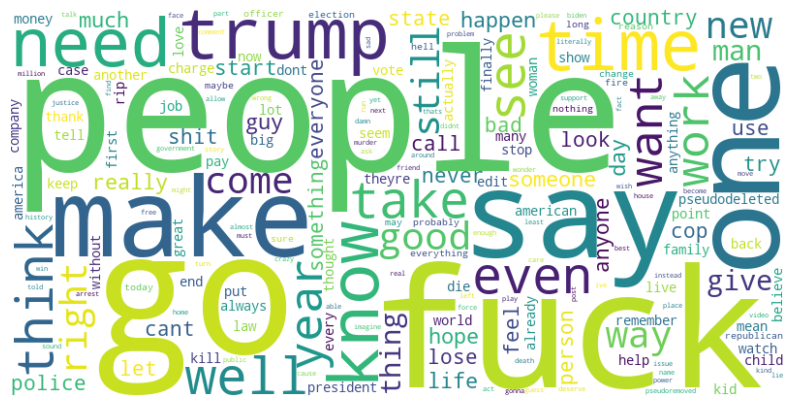

In [37]:
# Word Cloud for r/news comments
news_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(news_comments_df['body_cleaned_lemmatized']))
plt.figure(figsize=(10, 15))
plt.imshow(news_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

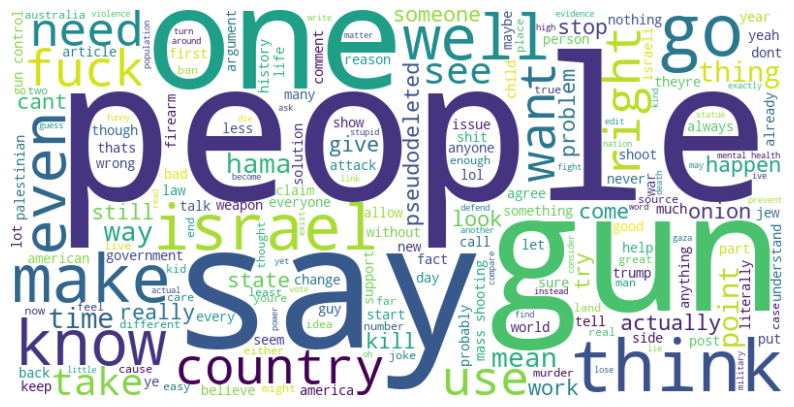

In [38]:
# Word Cloud for r/TheOnion comments
onion_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(onion_comments_df['body_cleaned_lemmatized']))
plt.figure(figsize=(10, 15))
plt.imshow(onion_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

(-0.5, 799.5, 399.5, -0.5)

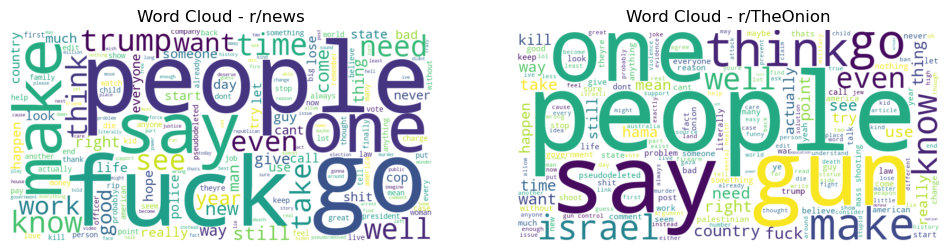

In [39]:
# combined word cloud for comments from both subreddits
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(news_comments_df['body_cleaned_lemmatized']))
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(onion_comments_df['body_cleaned_lemmatized']))

plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Word Cloud - r/news')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('Word Cloud - r/TheOnion')
plt.axis('off')

Word clouds show that the most frequently occurring words from each subreddit have a significant overlap.
Closer analysis of the top 20 words from each subreddit (as generated in the bar plots above) show that there are 15 common words in the top 20 words of both subreddits.

These words are: get, people, go, f*ck, one, make, say, time, know, take, think, right, well, want, even

#### EDA, Part 3: Comment Length Distribution
- Compare the distribution of comment lengths between the two subreddits.
- Visualise the distribution using histograms or box plots to see if there are differences in comment length.

In [40]:
print("Comment Length Analysis for r/news")
print(news_comments_df['comment_length'].describe())
print('\n')
print("Comment Length Analysis for r/TheOnion")
print(onion_comments_df['comment_length'].describe())

Comment Length Analysis for r/news
count    19970.000000
mean        30.751577
std         51.686676
min          1.000000
25%          9.000000
50%         17.000000
75%         34.000000
max       1854.000000
Name: comment_length, dtype: float64


Comment Length Analysis for r/TheOnion
count    17809.000000
mean        34.690213
std         57.683062
min          1.000000
25%          7.000000
50%         17.000000
75%         38.000000
max       1665.000000
Name: comment_length, dtype: float64


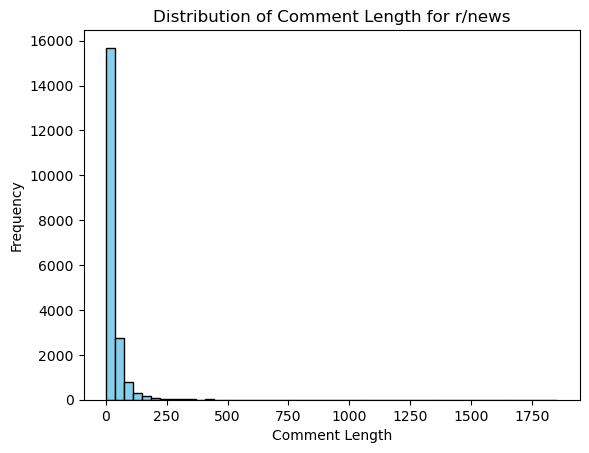

In [41]:
# distribution of comment length for r/news
plt.hist(news_comments_df['comment_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Comment Length for r/news')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

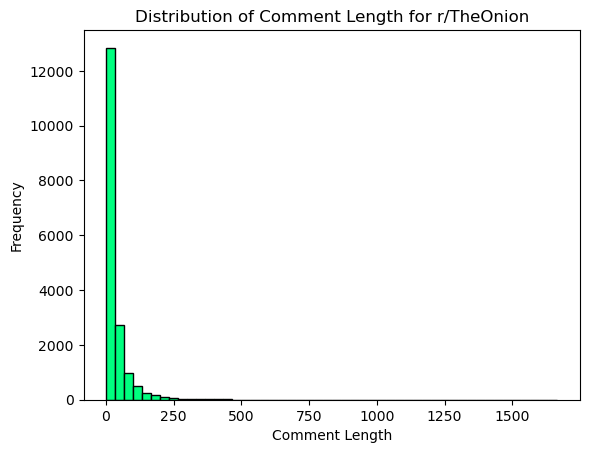

In [42]:
# distribution of comment length for r/TheOnion
plt.hist(onion_comments_df['comment_length'], bins=50, color='springgreen', edgecolor='black')
plt.title('Distribution of Comment Length for r/TheOnion')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

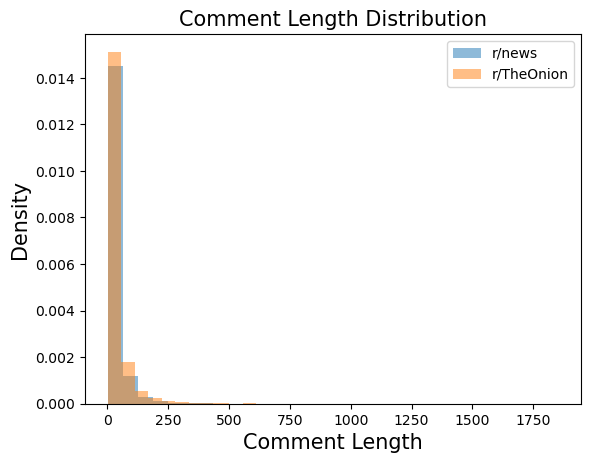

In [43]:
# combined plot for comment length distribution
plt.hist(news_comments_df['comment_length'], bins=30, alpha=0.5, label='r/news', density=True)
plt.hist(onion_comments_df['comment_length'], bins=30, alpha=0.5, label='r/TheOnion', density=True)
plt.title('Comment Length Distribution').set_size(15)
plt.xlabel('Comment Length').set_size(15)
plt.ylabel('Density').set_size(15)
plt.legend()
plt.show()

Generate the same plot for comment length distribution using log scale to better visualise the difference in comment lengths.

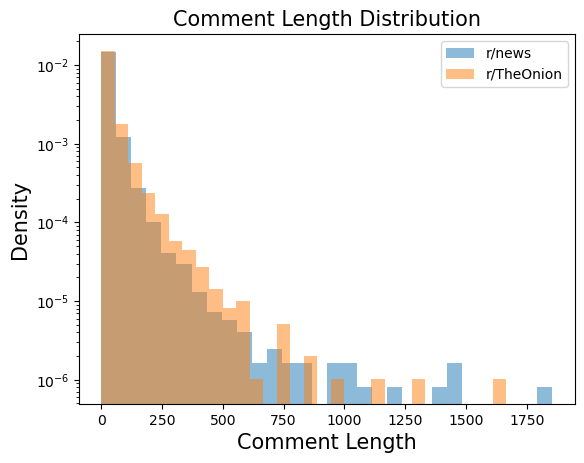

In [44]:
# combined plot for comment length distribution, log scale
plt.hist(news_comments_df['comment_length'], bins=30, alpha=0.5, label='r/news', density=True)
plt.hist(onion_comments_df['comment_length'], bins=30, alpha=0.5, label='r/TheOnion', density=True)
plt.title('Comment Length Distribution').set_size(15)
plt.xlabel('Comment Length').set_size(15)
plt.ylabel('Density').set_size(15)
plt.yscale('log')
plt.legend()
plt.show()

Comments from r/TheOnion are generally shorter than those from r/news.

r/news has a significantly higher number of comments greater than 750 words.

#### EDA, Part 4: Sentiment Analysis
- Perform sentiment analysis on comments from both subreddits to compare the overall sentiment.
- Calculate sentiment scores for each comment and compare the distributions of sentiment scores between subreddits.

In [45]:
print("Sentiment Score Analysis for r/news")
print(news_comments_df['sentiment_score'].describe())
print('\n')
print("Sentiment Score Analysis for r/TheOnion")
print(onion_comments_df['sentiment_score'].describe())

Sentiment Score Analysis for r/news
count    19970.000000
mean         0.041354
std          0.286078
min         -1.000000
25%         -0.053333
50%          0.000000
75%          0.175000
max          1.000000
Name: sentiment_score, dtype: float64


Sentiment Score Analysis for r/TheOnion
count    17809.000000
mean         0.042502
std          0.249320
min         -1.000000
25%         -0.008333
50%          0.000000
75%          0.146939
max          1.000000
Name: sentiment_score, dtype: float64


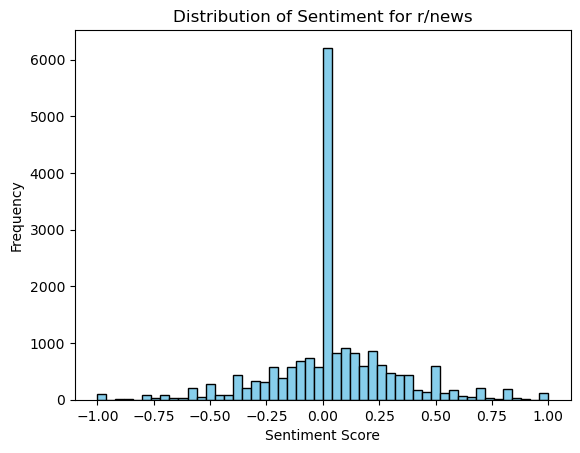

In [46]:
# distribution of sentiment score for r/news
plt.hist(news_comments_df['sentiment_score'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment for r/news')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

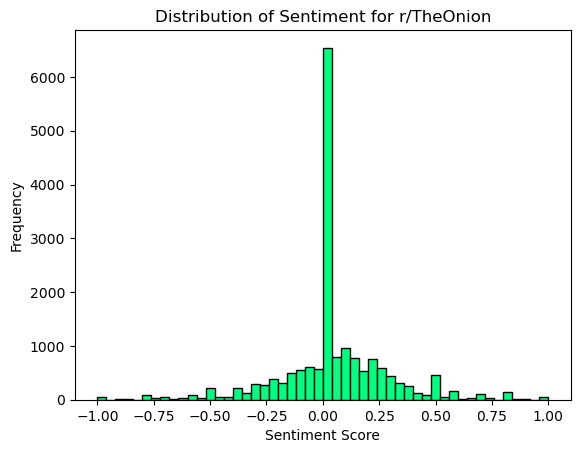

In [47]:
# distribution of sentiment score for r/TheOnion
plt.hist(onion_comments_df['sentiment_score'], bins=50, color='springgreen', edgecolor='black')
plt.title('Distribution of Sentiment for r/TheOnion')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

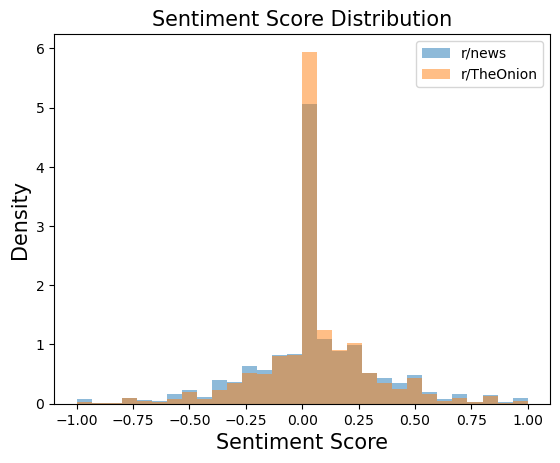

In [48]:
# combined plot for sentiment score distribution
plt.hist(news_comments_df['sentiment_score'], bins=30, alpha=0.5, label='r/news', density=True)
plt.hist(onion_comments_df['sentiment_score'], bins=30, alpha=0.5, label='r/TheOnion', density=True)
plt.title('Sentiment Score Distribution').set_size(15)
plt.xlabel('Sentiment Score').set_size(15)
plt.ylabel('Density').set_size(15)
plt.legend()
plt.show()

Generate the same plot for sentiment score distribution using log scale to better visualise the difference in sentiment scores.

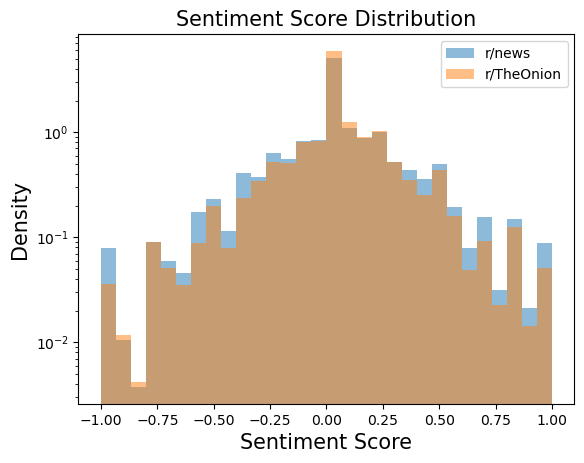

In [49]:
# combined plot for sentiment score distribution, log scale
plt.hist(news_comments_df['sentiment_score'], bins=30, alpha=0.5, label='r/news', density=True)
plt.hist(onion_comments_df['sentiment_score'], bins=30, alpha=0.5, label='r/TheOnion', density=True)
plt.title('Sentiment Score Distribution').set_size(15)
plt.xlabel('Sentiment Score').set_size(15)
plt.ylabel('Density').set_size(15)
plt.yscale('log')
plt.legend()
plt.show()

r/news comments tend to be more polarised (very positive and very negative).

#### EDA, Part 5: Sentiment Proportion
Calculate and compare the proportion of positive, negative and neutral sentiments in each subreddit using `LatentDirichletAllocation`.

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [51]:
# function to classify emotional tone based on sentiment score
def classify_emotional_tone(sentiment_score):
    if sentiment_score > 0.3: # scores greater than 0.3 are positive
        return 'Positive'
    elif sentiment_score < -0.3: # scores greater than -0.3 are negative
        return 'Negative'
    else:
        return 'Neutral'

news_comments_df['emotional_tone'] = news_comments_df['sentiment_score'].apply(classify_emotional_tone)
onion_comments_df['emotional_tone'] = onion_comments_df['sentiment_score'].apply(classify_emotional_tone)

print("Emotional Tone Distribution in r/news:")
print(news_comments_df['emotional_tone'].value_counts() / len(news_comments_df) * 100)
print('\n')
print("Emotional Tone Distribution in r/TheOnion:")
print(onion_comments_df['emotional_tone'].value_counts() / len(onion_comments_df) * 100)

Emotional Tone Distribution in r/news:
emotional_tone
Neutral     76.259389
Positive    14.481723
Negative     9.258888
Name: count, dtype: float64


Emotional Tone Distribution in r/TheOnion:
emotional_tone
Neutral     82.194396
Positive    11.168510
Negative     6.637094
Name: count, dtype: float64


The range of scores to determine positive vs negative sentiment are adjusted from [-0.1,0.1] to [-0.2,0.2] to [-0.3,0.3].

Eventually, [-0.3,0.3] was chosen as it mirrors the sentiment score histogram most closely.

#### EDA, Part 6: Topic Modelling
- `LatentDirichletAllocation` used to identify common topics or themes in comments from each subreddit.
- Compare the prevalence of different topics between subreddits to see if there are distinct discussion topics/themes.

In [52]:
# function to perform topic modeling
def perform_topic_modeling(comments):
    vectorizer = CountVectorizer(max_features=1000, stop_words='english')
    X = vectorizer.fit_transform(comments['body_cleaned_lemmatized'])
    
    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(X)
    
    for topic_idx, topic in enumerate(lda.components_):
        print(f"Topic {topic_idx + 1}:")
        print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
        print()

print("Topics for r/news")
perform_topic_modeling(news_comments_df)

print("Topics for r/TheOnion")
perform_topic_modeling(onion_comments_df)

Topics for r/news
Topic 1:
['republican', 'right', 'people', 'election', 'state', 'say', 'president', 'vote', 'news', 'trump']

Topic 2:
['need', 'guy', 'murder', 'say', 'charge', 'people', 'officer', 'kill', 'cop', 'police']

Topic 3:
['rest', 'hope', 'shit', 'rip', 'time', 'year', 'man', 'good', 'life', 'fuck']

Topic 4:
['people', 'say', 'thing', 'time', 'child', 'justice', 'tax', 'court', 'make', 'year']

Topic 5:
['need', 'fuck', 'dont', 'think', 'know', 'pseudodeleted', 'want', 'make', 'work', 'people']

Topics for r/TheOnion
Topic 1:
['make', 'die', 'say', 'want', 'attack', 'use', 'state', 'right', 'kill', 'people']

Topic 2:
['american', 'government', 'need', 'know', 'work', 'right', 'make', 'country', 'yeah', 'think']

Topic 3:
['war', 'jew', 'people', 'want', 'israeli', 'thing', 'say', 'palestinian', 'hamas', 'israel']

Topic 4:
['firearm', 'ban', 'shoot', 'problem', 'country', 'shooting', 'law', 'mass', 'people', 'gun']

Topic 5:
['know', 'think', 'time', 'comment', 'post', 

---
### Export post-EDA cleaned data

Export the post-EDA cleaned data frame into a CSV file to train the model in the next step

In [53]:
df_list = [news_comments_df, onion_comments_df ]
cleaned_comments_df = pd.concat(df_list)
cleaned_comments_df.reset_index(drop=True, inplace=True)

cleaned_comments_df.to_csv(f"../data/03_data_post_EDA.csv", index = False)